In [284]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pylab
import datetime
import numpy
import dateutil
import matplotlib.dates as mdates

plt.rcParams["figure.figsize"] = (15,10)

In [262]:
data = pd.read_excel('IaC_study_Descriptive_statistics.xlsx')
# Google trends were downloaded the 1st of April 2019
google_trends = pd.read_csv('multiTimeline.csv')
google_trends = google_trends.reset_index().iloc[1:]
google_trends['Categoría: Todas las categorías'] = google_trends['Categoría: Todas las categorías'].apply(lambda x: int(x))

### Publication year

In [292]:
grouped_data = pd.DataFrame(data['year'].apply(lambda x: str(x)).value_counts().sort_index()).reset_index()

In [333]:
grouped_data = grouped_data[grouped_data['index'] != '-']
grouped_data = grouped_data[grouped_data['index'] != '2019']

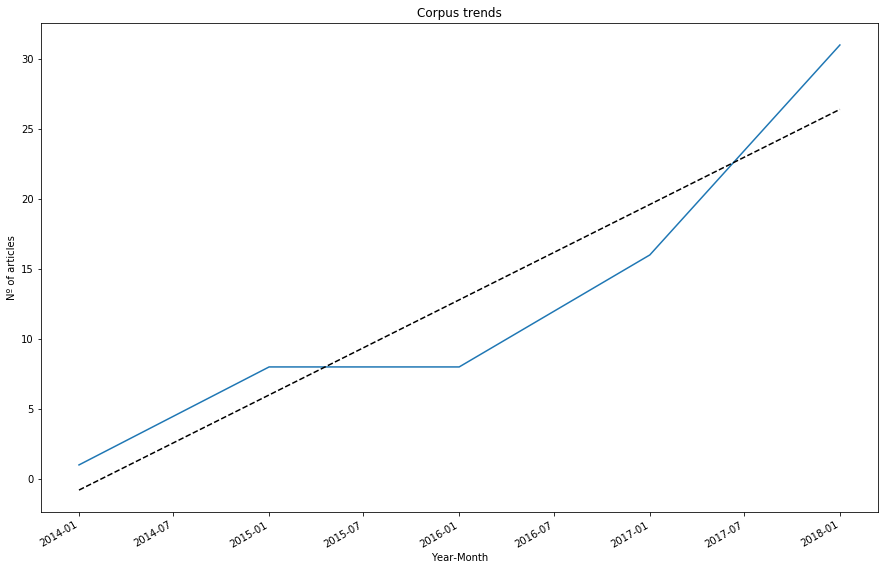

In [373]:
y=grouped_data['year']
xStrings=grouped_data['index']

# Convert strings to datetime objects,and then to Matplotlib date numbers
dates = [dateutil.parser.parse(x+'-01-01') for x in xStrings]
x = mdates.date2num(dates)

# plot the data itself
pylab.plot(x,y,'-')

# calc the trendline (it is simply a linear fitting)
z = numpy.polyfit(x, y, 1)
p = numpy.poly1d(z)

polyX = numpy.linspace(x.min(), x.max(), 100)
pylab.plot(polyX,p(polyX),"k--")

# Show X-axis major tick marks as dates
loc= mdates.AutoDateLocator()
plt.gca().xaxis.set_major_locator(loc)
plt.gca().xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))
plt.gcf().autofmt_xdate()
plt.ylabel('Nº of articles')
plt.xlabel('Year-Month')
plt.title('Corpus trends');
pylab.show()

### Google trends

In [264]:
google_trends['index'] = google_trends['index'].apply(lambda x: x[0:7])

In [265]:
grouped_trends = google_trends.groupby(['index']).sum().reset_index()

In [266]:
grouped_trends['Categoría: Todas las categorías'] = grouped_trends['Categoría: Todas las categorías']/google_trends.groupby(['index']).count().reset_index()['Categoría: Todas las categorías']

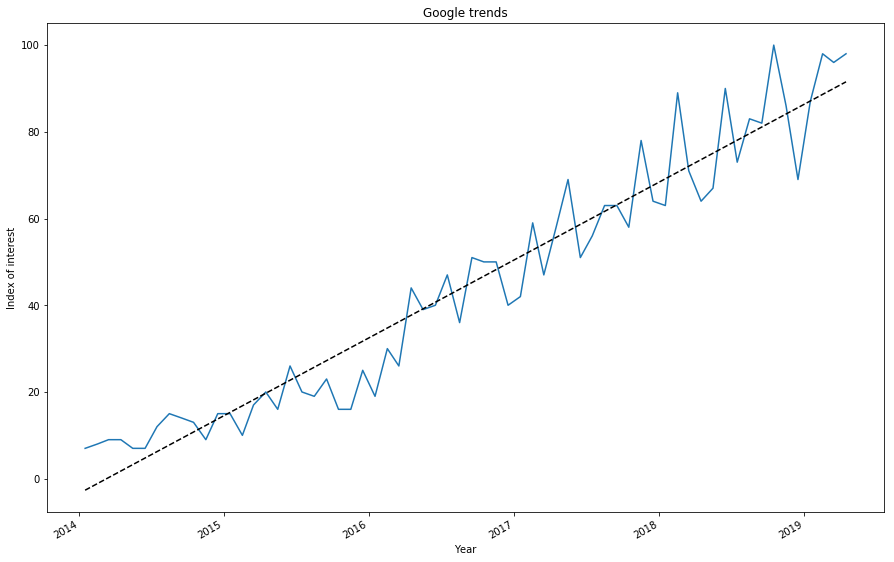

In [310]:
y=grouped_trends['Categoría: Todas las categorías']
xStrings=grouped_trends['index']

# Convert strings to datetime objects,and then to Matplotlib date numbers
dates = [dateutil.parser.parse(x) for x in xStrings]
x = mdates.date2num(dates)

# plot the data itself
pylab.plot(x,y,'-')

# calc the trendline (it is simply a linear fitting)
z = numpy.polyfit(x, y, 1)
p = numpy.poly1d(z)

polyX = numpy.linspace(x.min(), x.max(), 100)
pylab.plot(polyX,p(polyX),"k--")

# Show X-axis major tick marks as dates
loc= mdates.AutoDateLocator()
plt.gca().xaxis.set_major_locator(loc)
plt.gca().xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))
plt.gcf().autofmt_xdate()
plt.ylabel('Index of interest')
plt.xlabel('Year')
plt.title('Google trends');
pylab.show()

### Publishing platform

In [157]:
data['medio de publicación'].value_counts()

github                            6
slideshare                        5
medium                            4
Thorntech                         2
Ansible                           2
hackernoon                        2
dzone                             2
techbeacon                        2
opencredo                         2
puppet                            2
ibm                               2
http://blog.danzil.io             1
thenewstack                       1
mydbops.wordpress                 1
ovoenergy                         1
networkcomputing                  1
qualysoft                         1
rock-it                           1
ThoughtWorks                      1
Red Badger                        1
Tasktop Technologies              1
ragnarson                         1
thorntech                         1
garylarizza                       1
hashicorp                         1
chef                              1
riskfocus                         1
Qualibrate                  

### Publishing organization

In [158]:
data['organización'].value_counts()

-                                 4
puppet                            3
Site Reliability Engineering      3
chef                              2
opencredo                         2
Ansible                           2
IbexLabs                          2
Société Générale                  2
ansible                           2
Freelance                         2
Thorntech                         2
ibm                               2
PerkinElmer                       1
acloud.guru                       1
ovoenergy                         1
thenewstack                       1
SOFTWARE ENGINEERING INSTITUTE    1
whatis                            1
ebay                              1
newrelic                          1
IPSY                              1
ThoughtWorks                      1
Red Badger                        1
Tasktop Technologies              1
ragnarson                         1
pysysops                          1
thorntech                         1
Tile                        

In [159]:
data['entries published in the same webpage'].value_counts()

-      22
1       7
>75     6
2       4
5       4
6       4
4       3
7       3
23      2
8       2
65      1
70      1
10      1
11      1
12      1
37      1
20      1
21      1
54      1
43      1
18      1
Name: entries published in the same webpage, dtype: int64

In [160]:
data['positive comments'].value_counts()

-    31
0    24
1     5
2     4
5     3
4     1
Name: positive comments, dtype: int64

In [161]:
data['negative comments'].value_counts()

0    35
-    31
1     2
Name: negative comments, dtype: int64

In [162]:
data['neutral comments/questions/others'].value_counts()

-    31
0    30
5     2
3     2
1     2
2     1
Name: neutral comments/questions/others, dtype: int64

In [139]:
data['likes/claps'].value_counts()

-      47
0       6
2       2
4       2
1       2
3       2
15      1
46      1
75      1
7       1
35      1
553     1
483     1
19      1
Name: likes/claps, dtype: int64

In [163]:
data['author'].value_counts()

Mike Chan                     3
Gary Larizza                  3
Vikram Nallamala              2
\nDavid Danzilio              2
Steve struut                  2
Ricardo Matsui                1
Timothy Appnel                1
Burce Cutler                  1
Timothy Campbell              1
WILL ROBINSON                 1
Chef                          1
pulseenergy                   1
Mark Robinson                 1
Engin Yöyen                   1
Nick Rycar                    1
Martin                        1
Jiri Tyr                      1
Andreas Sommer                1
Eric Krupnik                  1
Brett Johnson                 1
WILL MAY                      1
Ansible                       1
Jakub Skałecki                1
Tim Birkett                   1
Artem Starostenko             1
Raj Bissessar                 1
Red Badger Team               1
Andrew Beresford              1
jonah horowitz                1
Soroush Atarod                1
                             ..
Aiman Na

In [165]:
data[data['author'] == 'Gary Larizza']

,author,year,positive comments,negative comments,neutral comments/questions/others,likes/claps,entries published in the same webpage,medio de publicación,organización
42,Gary Larizza,2014,2,1,1,0,2,garylarizza,Puppet
45,Gary Larizza,2016,0,0,0,2,-,slideshare,puppet
67,Gary Larizza,2017,-,-,-,-,-,puppet,puppet
